In [1]:
import pandas
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## read in the data and preliminary visualization

In [42]:
df = pandas.read_csv("ex2data1.txt", names=['x','y','label'], index_col=False)

In [43]:
df.head()

,x,y,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [44]:
df.tail()

,x,y,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [18]:
df.describe()

,x,y,label
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [19]:
df.label.unique()

array([1, 0])

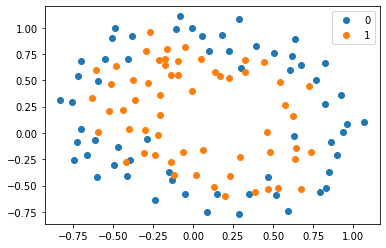

In [20]:

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend()

plt.show()

## train a classifier from scratch - Naive Bayes

In [21]:
# get the data into arrays since that is what scikit expects
feature_cols = ['x','y']

X = df[feature_cols].values
y = df['label'].values



In [22]:
X, y

(array([[ 0.051267 ,  0.69956  ],
        [-0.092742 ,  0.68494  ],
        [-0.21371  ,  0.69225  ],
        [-0.375    ,  0.50219  ],
        [-0.51325  ,  0.46564  ],
        [-0.52477  ,  0.2098   ],
        [-0.39804  ,  0.034357 ],
        [-0.30588  , -0.19225  ],
        [ 0.016705 , -0.40424  ],
        [ 0.13191  , -0.51389  ],
        [ 0.38537  , -0.56506  ],
        [ 0.52938  , -0.5212   ],
        [ 0.63882  , -0.24342  ],
        [ 0.73675  , -0.18494  ],
        [ 0.54666  ,  0.48757  ],
        [ 0.322    ,  0.5826   ],
        [ 0.16647  ,  0.53874  ],
        [-0.046659 ,  0.81652  ],
        [-0.17339  ,  0.69956  ],
        [-0.47869  ,  0.63377  ],
        [-0.60541  ,  0.59722  ],
        [-0.62846  ,  0.33406  ],
        [-0.59389  ,  0.005117 ],
        [-0.42108  , -0.27266  ],
        [-0.11578  , -0.39693  ],
        [ 0.20104  , -0.60161  ],
        [ 0.46601  , -0.53582  ],
        [ 0.67339  , -0.53582  ],
        [-0.13882  ,  0.54605  ],
        [-0.29

In [23]:
# train a classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() # step 1
trained_classifier = classifier.fit(X,y)  # step 2 
trained_classifier


GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
# make some predictions
y_predict = trained_classifier.predict(X) # step 3 

y_predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
df['predict'] = y_predict
df


,x,y,label,predict
0,0.051267,0.699560,1,1
1,-0.092742,0.684940,1,1
2,-0.213710,0.692250,1,1
3,-0.375000,0.502190,1,1
4,-0.513250,0.465640,1,1
5,-0.524770,0.209800,1,1
6,-0.398040,0.034357,1,1
7,-0.305880,-0.192250,1,1
8,0.016705,-0.404240,1,1
9,0.131910,-0.513890,1,1


In [26]:
# see how good we did?
print("Number of mislabeled points out of a total %d points : %d"
      % (len(y),sum(y != y_predict)))




Number of mislabeled points out of a total 118 points : 30


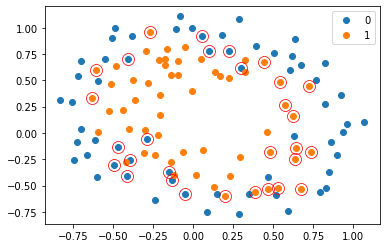

In [27]:
# can we figure out which ones didnt match prediction

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend()

bad_filter = df.label != df.predict
df_bad = df[bad_filter]
ax.plot(df_bad.x, df_bad.y, "ro", ms=12, mew=.75, markerfacecolor="None", markeredgecolor='red', linestyle='')

plt.show()



## define some helper routines

In [28]:
def training_data_from_dataframe(df, feature_cols, label_col='label'):
    X = df[feature_cols].values
    y = df[label_col].values
    
    return X,y

In [29]:
from sklearn.preprocessing import StandardScaler
def scale_features(X):

    scaler = StandardScaler()
    scaler.fit(X)  # Don't cheat - fit only on training data
    return scaler.transform(X)

def scaled_data_from_dataframe(df, feature_cols, label_col='label'):
    X,y = training_data_from_dataframe(df, feature_cols, label_col)
    X_scaled = scale_features(X)
    return X_scaled, y

In [30]:
def train_classifer(classifier, df, feature_cols, label_col='label'):
    X,y = training_data_from_dataframe(df, feature_cols)
    trained_classifier = classifier.fit(X,y) 
    return trained_classifier

In [31]:
def classifier_predict(trained_classifer, df, feature_cols, label_col='label'):
    X,y = training_data_from_dataframe(df, feature_cols)
    y_predict = trained_classifier.predict(X)
    df['predict'] = y_predict
    accuracy = 1. * sum(y == y_predict) / len(y)
    return accuracy
    

In [32]:
def classifier_decision_boundary(trained_classifier, df, feature_cols):
    f_range = list()
    for ff in feature_cols:
        f_min = df[ff].min()
        f_max = df[ff].max()
        f_step = (f_max - f_min) / 100.
        f_range.append( (f_min, f_max, f_step) )
        
    xx, yy = np.mgrid[f_range[0][0]:f_range[0][1]:f_range[0][2], f_range[1][0]:f_range[1][1]:f_range[1][2]]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = trained_classifier.predict_proba(grid)[:, 1].reshape(xx.shape)  
    return(xx,yy,probs)

In [33]:
def plot_predict(df, trained_classifier=None, feature_cols=None):
       
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    
    groups = df.groupby('label')
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
        
    bad_filter = df.label != df.predict
    df_bad = df[bad_filter]
    ax.plot(df_bad.x, df_bad.y, "ro", ms=12, mew=.75, markerfacecolor="None", markeredgecolor='red', linestyle='')

    if trained_classifier is not None:
        try:
            (xx,yy,probs) = classifier_decision_boundary(trained_classifier, df, feature_cols)
            ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1)
        except:
            pass
    ax.legend()


#fig = plot_predict(df, trained_classifier, feature_cols)


## naive bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

feature_cols = ['x','y']
X,y = training_data_from_dataframe(df, feature_cols)

classifier = GaussianNB()
trained_classifier = classifier.fit(X,y)
y_predict = trained_classifier.predict(X)
df['predict'] = y_predict

print("Number of mislabeled points out of a total %d points : %d"
      % (len(y),sum(y != y_predict)))



Number of mislabeled points out of a total 118 points : 30


training accuracy =  0.7457627118644068


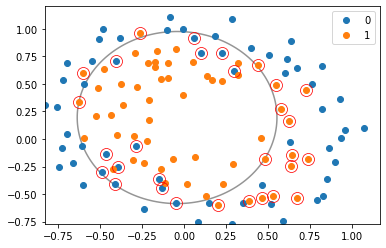

In [35]:
# visiualize training error
print ("training accuracy = ", classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## logistic regression

/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accuracy =  0.5423728813559322


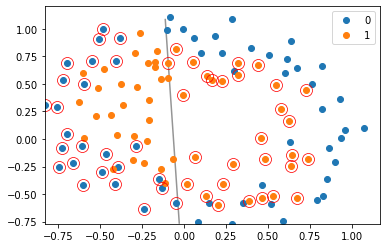

In [36]:
feature_cols = ['x','y']

from sklearn import linear_model
classifier = linear_model.LogisticRegression()
trained_classifier = train_classifer(classifier, df, feature_cols)
print ("training accuracy = ", classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## support vector machines (SVM)

0.5508474576271186


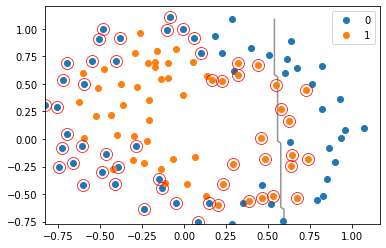

In [37]:
#linear SVM
feature_cols = ['x','y']
from sklearn import svm

classifier = svm.SVC(kernel='linear', probability=True)
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4915254237288136


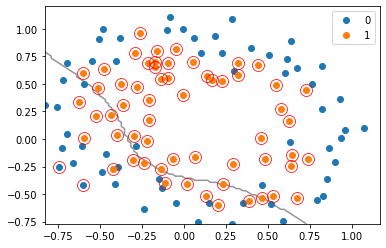

In [38]:
#polynomial SVM
feature_cols = ['x','y']
from sklearn import svm

classifier = svm.SVC(kernel='poly', probability=True)
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8050847457627118


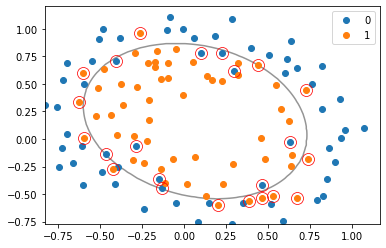

In [39]:
# rbf kernel for SVM

feature_cols = ['x','y']
from sklearn import svm

classifier = svm.SVC(kernel='rbf', probability=True)
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## stochastic gradient descent (SGD)

0.4915254237288136


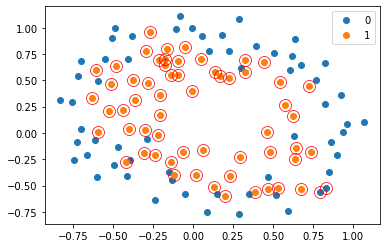

In [40]:

from sklearn import linear_model
classifier = linear_model.SGDClassifier(loss='hinge',  penalty="l2")

trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## perceptron

0.5084745762711864


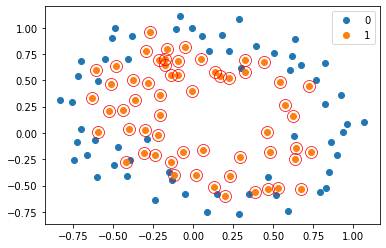

In [41]:

from sklearn import linear_model
classifier = linear_model.Perceptron()
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)
